In [1]:
import pandas as pd

df = pd.read_csv('partidos_cebollitas.csv')

df['diferencia_goles'] = df['goles_local'] - df['goles_visitante']
df['ratio_tiros_posesion_local'] = df['tiros_arco_local'] / df['posesion_local (%)']

df.head(10)

,fecha_partido,equipo_local,equipo_visitante,goles_local,goles_visitante,posesion_local (%),posesion_visitante (%),tiros_arco_local,tiros_arco_visitante,estadio,diferencia_goles,ratio_tiros_posesion_local
0,2023-01-01,Atlético Python,Cebollitas FC,2,0,54,46,12,6,Python Arena,2,0.222222
1,2023-01-08,NumPy City,Atlético Python,1,5,60,40,12,3,Estadio ML,-4,0.200000
2,2023-01-15,Cebollitas FC,Data United,1,0,55,45,10,7,Python Arena,1,0.181818
3,2023-01-22,Atlético Python,Data United,2,3,57,43,3,3,Campo Pandas,-1,0.052632
4,2023-01-29,Data United,Cebollitas FC,5,3,52,48,7,12,Estadio ML,2,0.134615
5,2023-02-05,Data United,Cebollitas FC,3,3,60,40,8,11,Python Arena,0,0.133333
6,2023-02-12,Data United,Real Pandas,4,1,49,51,4,8,Estadio ML,3,0.081633
7,2023-02-19,Cebollitas FC,Real Pandas,1,2,56,44,5,5,Estadio ML,-1,0.089286
8,2023-02-26,NumPy City,Data United,1,5,60,40,9,9,Estadio DataCamp,-4,0.150000
9,2023-03-05,Atlético Python,Cebollitas FC,1,4,43,57,10,7,Estadio ML,-3,0.232558


In [2]:
from sklearn.feature_selection import SelectKBest, f_regression

#Variables independientes (X) y dependiente (y) 
x = df[['posesion_local (%)', 'tiros_arco_local', 'ratio_tiros_posesion_local']] # matriz de características
y = df['goles_local'] #Variable a predecir

# Selección de las 2 mejores características
slector = SelectKBest(score_func=f_regression, k=2)
slector.fit(x, y) #permite calcular la media y la varianza de cada característica


scores = slector.scores_ #obtenemos los scores de cada característica, mientras mas alto, mayor asosiación con la variable dependiente
variables = x.columns

resultado = pd.DataFrame({'Variable': variables, 'Score': scores}).sort_values(by='Score', ascending=False)
resultado

,Variable,Score
0,posesion_local (%),2.844159
2,ratio_tiros_posesion_local,2.323320
1,tiros_arco_local,1.372691


In [3]:
from sklearn.tree import DecisionTreeRegressor

modelo_arbol = DecisionTreeRegressor(random_state=42) #Reproduce aleatoriedad para que los resultados sean reproducibles
modelo_arbol.fit(x, y) #Se encarga de aprender la relación entre las variables independientes y dependiente

importancia = modelo_arbol.feature_importances_ #obtenemos la importancia de cada característica

resultado_importancia = pd.DataFrame({'Variable': variables, 'Importancia': importancia}).sort_values(by='Importancia', ascending=False)

resultado_importancia

,Variable,Importancia
0,posesion_local (%),0.491563
2,ratio_tiros_posesion_local,0.305755
1,tiros_arco_local,0.202683


/tmp/ipykernel_16944/1394228689.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=resultado, x='Score', y='Variable', ax=ax[0], palette='Blues_r')
/tmp/ipykernel_16944/1394228689.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=resultado_importancia, x='Importancia', y='Variable', ax=ax[1], palette='Greens_r')


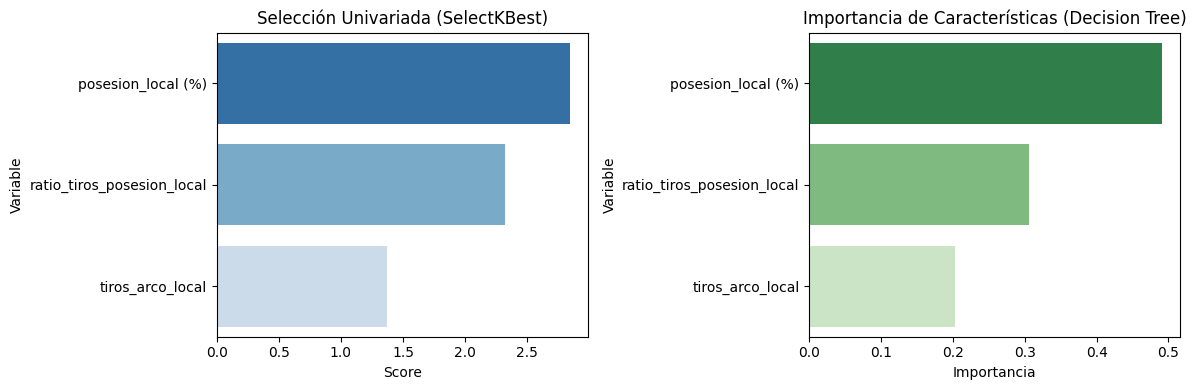

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1,2, figsize=(12, 4))

sns.barplot(data=resultado, x='Score', y='Variable', ax=ax[0], palette='Blues_r')
ax[0].set_title('Selección Univariada (SelectKBest)')

sns.barplot(data=resultado_importancia, x='Importancia', y='Variable', ax=ax[1], palette='Greens_r')
ax[1].set_title('Importancia de Características (Decision Tree)')

plt.tight_layout()
plt.show()